# Python Intermedio, primera parte — Sesión 4

- Estadística descriptiva con Pandas: medidas de tendencia central, dispersión y percentiles.  
- Identificación de valores atípicos y patrones.  
- Introducción al web scraping y aplicaciones en análisis económico.  
- Extracción de datos con `requests` y `BeautifulSoup`.  
- Almacenamiento y tratamiento de la información obtenida.  
- Buenas prácticas y consideraciones éticas en la obtención de datos.  

**Objetivo general:**  
Aprender a realizar análisis exploratorio de datos con Pandas y ejecutar procesos de web scraping utilizando `requests` y `BeautifulSoup`, aplicados al análisis de datos reales de una página web.


## 1. Setup inicial

In [46]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", "{:,.2f}".format)

np.random.seed(42)

print(pd.__version__)

2.2.2


---
## 2. Análisis exploratorio con Pandas

En análisis económico y de datos en general nos interesa identificar:

- Tendencias y niveles típicos de las variables.
- Dispersión y variabilidad.
- Percentiles para entender la distribución.
- Posibles valores atípicos que puedan sesgar el análisis.

Con Pandas podemos trabajar con:

- Medidas de tendencia central: `mean()`, `median()`, `mode()`.
- Medidas de dispersión: `std()`, `var()`, `min()`, `max()`, `quantile()`.
- Percentiles: con `quantile()`.


### 2.1. Creamos un dataset de ejemplo

In [53]:
n = 200
df = pd.DataFrame({
    "empresa": np.random.choice(["A", "B", "C", "D"], size=n),
    "ventas": np.random.normal(50000, 15000, n).clip(5000, None),
    "empleados": np.random.randint(10, 300, n),
    "precio_usd": np.random.uniform(0.8, 1.2, n)
})
df.head()

,empresa,ventas,empleados,precio_usd
0,A,"49,017.84",74,1.01
1,D,"62,111.26",186,0.81
2,C,"62,607.91",12,1.12
3,A,"49,422.62",151,0.92
4,A,"43,347.80",167,1.16


### 2.2. ACTIVIDAD 1  
Medidas descriptivas básicas

Objetivos:
1. Calcular media, mediana y percentiles.
2. Analizar la distribución de una variable económica.

Instrucciones: completa las líneas de código faltantes.


In [48]:
# ACTIVIDAD 1: Tendencia central y percentiles
# --------------------------------------------------

# 1) Media de ventas
media_ventas = ...

# 2) Mediana de empleados
mediana_empleados = ...

# 3) Percentil 90 de ventas
p90_ventas = ...

print("Media ventas:", media_ventas)
print("Mediana empleados:", mediana_empleados)
print("P90 ventas:", p90_ventas)

Media ventas: Ellipsis
Mediana empleados: Ellipsis
P90 ventas: Ellipsis


### Solución propuesta - Actividad 1

In [51]:
media_ventas = df["ventas"].mean().round(2)
mediana_empleados = df["empleados"].median()
p90_ventas = df["ventas"].quantile(0.90)

print("Media ventas:", media_ventas)
print("Mediana empleados:", mediana_empleados)
print("P90 ventas:", p90_ventas)

Media ventas: 50286.54
Mediana empleados: 172.0
P90 ventas: 67385.78594483239


In [52]:
print(f"Media ventas: {media_ventas:,.2f}")
print(f"Mediana empleados: {mediana_empleados:,.2f}")
print(f"P90 ventas: {p90_ventas:,.2f}")


Media ventas: 50,286.54
Mediana empleados: 172.00
P90 ventas: 67,385.79


---
## 3. Identificación de valores atípicos

Usaremos el criterio basado en el rango intercuartílico (IQR):

- `IQR = Q3 - Q1`
- Límite inferior = `Q1 - 1.5 * IQR`
- Límite superior = `Q3 + 1.5 * IQR`

Todo lo que esté por debajo del límite inferior o por encima del límite superior puede considerarse un posible outlier.


### 3.1. ACTIVIDAD 2  
Detectar outliers en ventas usando IQR

Instrucciones: completa el código para identificar outliers en la columna `ventas`.


In [12]:
# ACTIVIDAD 2: Outliers con IQR
# --------------------------------------------------

q1 = ...
q3 = ...
iqr = ...

lim_inf = ...
lim_sup = ...

outliers = ...

outliers.head()

AttributeError: 'ellipsis' object has no attribute 'head'

### Solución propuesta - Actividad 2

In [36]:
q1 = df["ventas"].quantile(0.25)
q3 = df["ventas"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df["ventas"] < lim_inf) | (df["ventas"] > lim_sup)]
outliers.head()

,empresa,ventas,empleados,precio_usd
103,D,"90,802.537",38,0.859
133,A,"107,790.972",182,1.043
186,B,"5,000.000",128,0.989


---
## 4. Introducción al web scraping

El web scraping es una herramienta esencial en el análisis económico moderno, especialmente cuando no existen bases de datos oficiales o APIs con acceso estructurado. Permite recolectar información en tiempo real, generar indicadores propios y ampliar el alcance del análisis empírico.

### 4.1. Aspectos clave para los economistas

### 4.1.1. ¿Para qué sirve el web scraping en economía?
De acuerdo con *Shamsi (2024)*, los economistas utilizan web scraping para:

- **Recolectar precios** y estudiar inflación, competencia, cadenas logísticas o dispersión de precios.  
- **Monitorear el mercado laboral** a través de avisos de empleo en línea (vacantes, salarios, habilidades requeridas).  
- **Analizar discurso público** (medios, redes sociales) para estudiar expectativas, sesgos o contenido político.  
- **Obtener datos inmobiliarios** para investigar dinámica de precios, inventarios, dispersión espacial o segmentación regional.  

Estos usos muestran que el scraping no solo reemplaza datos, sino que **abre nuevas fuentes de información económica** que antes no existían.

---

### 4.1.2. Web Scraping vs API
Según el documento:

- **Web Scraping**: se usa cuando no existe API o acceso directo a la base de datos. Extrae contenido de la estructura HTML.  
- **APIs**: más confiables, rápidas y estables; deben preferirse siempre que estén disponibles.  
- **SERP APIs**: permiten obtener resultados de búsqueda sin romper términos de servicio de Google o Bing.  

---

### 4.1.3. Páginas estáticas vs dinámicas
Un punto fundamental para estudiantes:

#### ✔ Páginas estáticas
- El contenido está “incrustado” en el HTML.  
- Herramientas: `requests`, `BeautifulSoup`, `pandas.read_html()`.  
- Generalmente las más fáciles para scraping.  

#### ✔ Páginas dinámicas
- Usan JavaScript para cargar contenido después de la primera carga.  
- No basta con descargar el HTML.  
- Requiere herramientas más avanzadas: Selenium, Scrapy + Splash.  

Esto ayuda a que tus alumnos entiendan **por qué algunas páginas “no funcionan” con requests**.

---

### 4.1.4. Consideraciones éticas y legales
El documento enfatiza varios puntos importantes para cualquier curso responsable:

- **Revisar términos de servicio** del sitio web antes de scrapeo.  
- **Respetar robots.txt** (aunque no es legalmente vinculante, sí es una convención ética).  
- **Evitar sobrecarga del servidor** → agregar pausas (`time.sleep()`), usar scraping responsable.  
- **Considerar protección de datos**: no recolectar información personal sin permiso.  
- **Consultar al IRB/Comité ético** para proyectos de investigación formal.  

Esto encaja perfecto con tu subtema de *“Buenas prácticas y consideraciones éticas”*.

---

### 4.1.5. Desafíos comunes al hacer scraping
Para preparar a los alumnos:

- **Identificación de elementos HTML**: usar el inspector del navegador (selectores, atributos, clases).  
- **Contenido paginado**: requiere bucles y patrones de URLs.  
- **Bloqueos (403, 429)**: se soluciona con headers, user-agent o ralentizando solicitudes.  
- **CAPTCHAs**: muchos sitios tienen defensas anti-bots; a veces scraping puede ser imposible.  
- **Datos desordenados o inconsistentes**: requieren limpieza, formato numérico y normalización.  

---

### 4.1.6. Buenas prácticas para investigación económica
El documento resume recomendaciones aplicables de inmediato en clase:

- Usar `headers` para simular navegadores reales.  
- Modularizar el código y hacerlo reproducible.  
- Guardar datos en CSV/JSON/SQL para auditoría y replicabilidad.  
- Documentar cada paso del scraping.  
- Probar frecuentemente porque las páginas cambian su estructura.  




### 4.2. Librerías para web scraping

In [56]:
import requests
from bs4 import BeautifulSoup

### 4.3. ACTIVIDAD 3  
Descargar el HTML de una página real

Web Scraping real desde Wikipedia. En esta actividad obtendremos las tablas del PIB nominal por país desde:
https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(nominal)

Instrucciones: completa la solicitud HTTP y revisa el código de estado.


In [63]:
url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(nominal)"

tablas = pd.read_html(url, encoding="utf-8")

for i, tabla in enumerate(tablas):
    tabla.to_csv(f"tabla_{i}.csv", index=False, encoding="utf-8")





HTTPError: HTTP Error 403: Forbidden

usar directamente la URL con read_html

In [65]:
url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(nominal)"

response = requests.get(url)
response.encoding = "utf-8"

soup = BeautifulSoup(response.text, "html.parser")

# Extrae todas las tablas de la página
tablas = pd.read_html(str(soup), encoding="utf-8")

# Guardar cada tabla como archivo CSV
for i, tabla in enumerate(tablas):
    tabla.to_csv(f"tabla_{i}.csv", index=False, encoding="utf-8")
    print(f"Tabla {i} guardada como tabla_{i}.csv")

print("Extracción completa.")


/tmp/ipython-input-1274846706.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablas = pd.read_html(str(soup), encoding="utf-8")
/usr/local/lib/python3.12/dist-packages/bs4/__init__.py:341: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn(


ValueError: No tables found

In [66]:
url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_PIB_(nominal)"

# 1) Simular un navegador para evitar el 403
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)
response.encoding = "utf-8"

# 2) Crear BeautifulSoup para inspección (opcional)
soup = BeautifulSoup(response.text, "html.parser")

# Extrae todas las tablas de la página
tablas = pd.read_html(str(soup), encoding="utf-8")

# Guardar cada tabla como archivo CSV
for i, tabla in enumerate(tablas):
    tabla.to_csv(f"tabla_{i}.csv", index=False, encoding="utf-8")
    print(f"Tabla {i} guardada como tabla_{i}.csv")

print("Extracción completa.")


/tmp/ipython-input-1062865050.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablas = pd.read_html(str(soup), encoding="utf-8")


Tabla 0 guardada como tabla_0.csv
Tabla 1 guardada como tabla_1.csv
Tabla 2 guardada como tabla_2.csv
Tabla 3 guardada como tabla_3.csv
Tabla 4 guardada como tabla_4.csv
Tabla 5 guardada como tabla_5.csv
Tabla 6 guardada como tabla_6.csv
Tabla 7 guardada como tabla_7.csv
Extracción completa.


### 4.4. ACTIVIDAD 4  

En la Actividad 3 guardamos varias tablas de Wikipedia como archivos CSV  
(`tabla_0.csv`, `tabla_1.csv`, `tabla_2.csv`, etc.).

Ahora vamos a trabajar con **una de esas tablas reales**, la `tabla_2.csv`, que contiene
información del **PIB nominal por país** (en millones de USD) extraída desde Wikipedia.  
Nuestro objetivo es:

1. Cargar la tabla en un `DataFrame` de Pandas.
2. Eliminar filas con valores no deseados en la columna de posición (`'Pos.'`)
   (por ejemplo, guiones `—` o valores nulos).
3. Hacer un análisis exploratorio rápido:
   - Ver las primeras filas.
   - Ver información del DataFrame (`.info()`).
   - Calcular estadísticas descriptivas del PIB.




In [41]:
# ACTIVIDAD 4: Cargar, limpiar y explorar tabla de PIB
# -------------------------------------------------------

import pandas as pd
import numpy as np

# 1) Carga la tabla 2 que generaste en la Actividad 3
pib_paises = pd.read_csv("tabla_2.csv")

# 2) Mira las primeras filas
print("Primeras filas SIN limpiar:")
print(pib_paises.head(), "\n")

# 3) Elimina filas donde la columna 'Pos.' tenga valores no deseados:
#    - Guiones ('—')
#    - Valores nulos (np.nan)
pib_paises_limpio = pib_paises[~pib_paises["Pos."].isin([... , np.nan])]

print("Después de limpiar filas con 'Pos.' no válida:")
print(pib_paises_limpio.head(), "\n")

# 4) (Opcional) Convierte la columna 'Pos.' a entero
pib_paises_limpio["Pos."] = ...

# 5) Muestra información general del DataFrame
print("Información del DataFrame limpio:")
...

# 6) Calcula estadísticas descriptivas del PIB nominal
#    (ajusta el nombre exacto de la columna según tu CSV)
pib_stats = pib_paises_limpio[...].describe()
print("\nEstadísticas descriptivas del PIB nominal:")
print(pib_stats)


Primeras filas SIN limpiar:
  Pos.                País PIB nominal (millones de USD)
0  NaN               Mundo                   104 476 432
1    1      Estados Unidos                    26 949 643
2    2               China                    17 700 899
3    —  Unión Europea [3]​                    16 641 391
4    3            Alemania                     4 429 838 

Después de limpiar filas con 'Pos.' no válida:
  Pos.                País PIB nominal (millones de USD)
1    1      Estados Unidos                    26 949 643
2    2               China                    17 700 899
3    —  Unión Europea [3]​                    16 641 391
4    3            Alemania                     4 429 838
5    4               Japón                     4 230 862 

Información del DataFrame limpio:


/tmp/ipython-input-2104541478.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_paises_limpio["Pos."] = ...


KeyError: Ellipsis

In [60]:
# SOLUCIÓN PROPUESTA - ACTIVIDAD 4
# -------------------------------------------------------

import pandas as pd
import numpy as np

# 1) Carga la tabla 2
pib_paises = pd.read_csv("tabla_2.csv")

print("Primeras filas SIN limpiar:")
print(pib_paises.head(), "\n")

# 2) Limpieza de filas: quitamos '—' y valores nulos en 'Pos.'
pib_paises_limpio = pib_paises[~pib_paises["Pos."].isin(["—", np.nan])]

print("Después de limpiar filas con 'Pos.' no válida:")
print(pib_paises_limpio.head(), "\n")

# 3) Convertimos 'Pos.' a entero
pib_paises_limpio["Pos."] = pib_paises_limpio["Pos."].astype(int)

# 4) Información general
print("Información del DataFrame limpio:")
print(pib_paises_limpio.info(), "\n")

# 5) Estadísticas descriptivas del PIB nominal
# Ajusta el nombre de la columna si en tu tabla sale ligeramente distinto
col_pib = "PIB nominal (millones de USD)"

# A veces esta columna llega como texto con comas o espacios, según el HTML.
# Si eso ocurre, puedes descomentar estas líneas para limpiar:
# pib_paises_limpio[col_pib] = (
#     pib_paises_limpio[col_pib]
#     .astype(str)
#     .str.replace("\u00a0", "")  # espacios duros
#     .str.replace(".", "", regex=False)  # si los usa como separador de miles
#     .str.replace(",", ".", regex=False)  # para separador decimal
#     .astype(float)
# )

pib_stats = pib_paises_limpio[col_pib].describe()
print("Estadísticas descriptivas del PIB nominal:")
print(pib_stats)


Primeras filas SIN limpiar:
  Pos.                País PIB nominal (millones de USD)
0  NaN               Mundo                   104 476 432
1    1      Estados Unidos                    26 949 643
2    2               China                    17 700 899
3    —  Unión Europea [3]​                    16 641 391
4    3            Alemania                     4 429 838 

Después de limpiar filas con 'Pos.' no válida:
  Pos.            País PIB nominal (millones de USD)
1    1  Estados Unidos                    26 949 643
2    2           China                    17 700 899
4    3        Alemania                     4 429 838
5    4           Japón                     4 230 862
6    5           India                     3 732 224 

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 1 to 193
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Pos. 

/tmp/ipython-input-1025754404.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_paises_limpio["Pos."] = pib_paises_limpio["Pos."].astype(int)


### 4.5. ACTIVIDAD 5

Ahora que ya cargamos y limpiamos la tabla del PIB nominal por país, vamos a:

1. Ordenar el DataFrame por PIB nominal (de mayor a menor).
2. Seleccionar el **Top 10 países con mayor PIB nominal**.
3. Crear un gráfico de barras con Matplotlib.
4. Personalizar el gráfico (título, ejes, rotación de etiquetas).

Esta actividad es clave porque combina:
- Limpieza → Orden → Selección → Visualización.

La idea es que completes el código con los pasos necesarios.  
Si el gráfico falla: **mejor**, así aprendemos a depurar.


In [24]:
# ACTIVIDAD 5: Top 10 por PIB y gráfico de barras
# -------------------------------------------------------

import matplotlib.pyplot as plt

# 1) Ordena el DataFrame limpio por PIB nominal (de mayor a menor)
pib_ordenado = pib_paises_limpio.sort_values(by=..., ascending=False)

# 2) Selecciona el Top 10
top10 = pib_ordenado.head(10)

print("Top 10 países por PIB nominal:")
print(top10, "\n")

# 3) Gráfico de barras simple
plt.figure(figsize=(10,6))

plt.bar(
    x=...,           # nombres de países
    height=...,      # valores de PIB
)

# 4) Personalizaciones mínimas
plt.title("Top 10 países por PIB nominal")
plt.xlabel("País")
plt.ylabel("PIB nominal (millones USD)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


KeyError: Ellipsis

Top 10 países por PIB nominal:

     Pos.        País PIB nominal (millones de USD)
71     70      Angola                        93 796
184   183       Samoa                           939
72     71   Venezuela                        92 210
151   150        Togo                          9111
73     72  Uzbekistán                        90 392
21     20       Suiza                       905 684
74     73  Luxemburgo                        89 095
75     74  Costa Rica                        85 590
76     75    Tanzania                        84 033
22     21     Polonia                       842 172


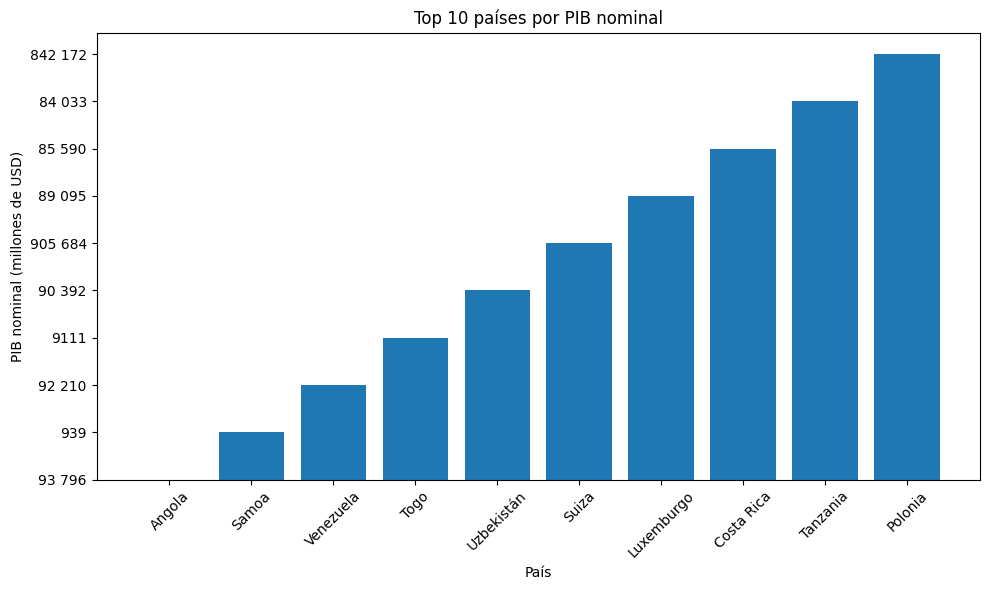

In [61]:
import matplotlib.pyplot as plt

# 1) Ordenar por PIB (de mayor a menor)
pib_ordenado = pib_paises_limpio.sort_values(
    by="PIB nominal (millones de USD)",
    ascending=False
)

# 2) Seleccionar Top 10
top10 = pib_ordenado.head(10)

print("Top 10 países por PIB nominal:\n")
print(top10)

# 3) Gráfico de barras
plt.figure(figsize=(10,6))

plt.bar(
    x=top10["País"],
    height=top10["PIB nominal (millones de USD)"]
)

# 4) Personalización
plt.title("Top 10 países por PIB nominal")
plt.xlabel("País")
plt.ylabel("PIB nominal (millones de USD)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


/tmp/ipython-input-484152764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_paises_limpio[col] = (


    Pos.            País  PIB nominal (millones de USD)
1      1  Estados Unidos                  26,949,643.00
2      2           China                  17,700,899.00
4      3        Alemania                   4,429,838.00
5      4           Japón                   4,230,862.00
6      5           India                   3,732,224.00
7      6     Reino Unido                   3,332,059.00
8      7         Francia                   3,049,016.00
9      8          Italia                   2,186,082.00
10     9          Brasil                   2,126,809.00
11    10          Canadá                   2,117,805.00


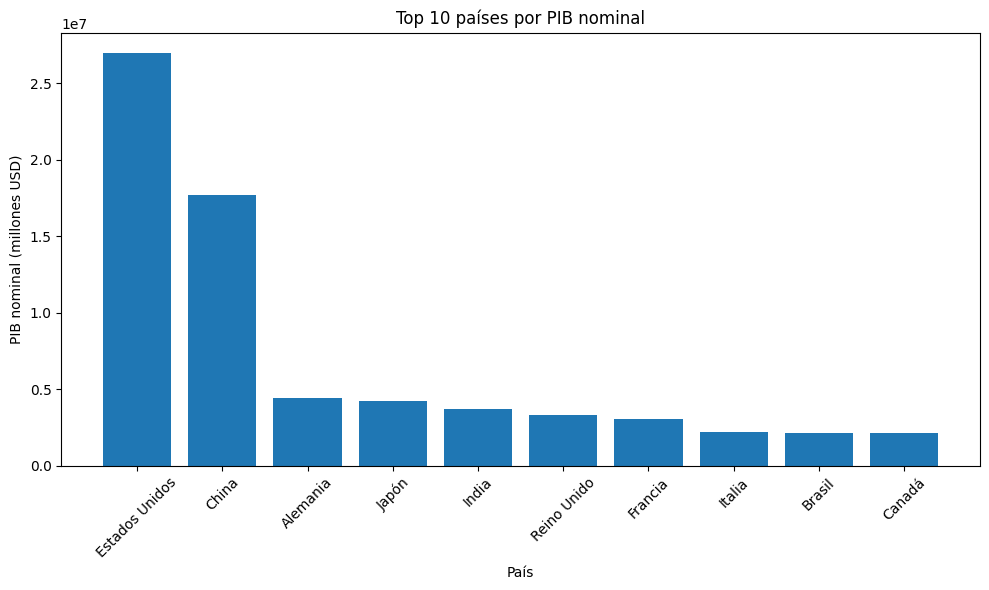

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

col = "PIB nominal (millones de USD)"

# LIMPIEZA ROBUSTA (Wikipedia usa \xa0)
pib_paises_limpio[col] = (
    pib_paises_limpio[col]
    .astype(str)
    .str.replace("\xa0", "", regex=False)  # elimina espacio duro
    .str.replace(" ", "", regex=False)     # elimina espacio normal
    .str.replace(",", ".", regex=False)    # por si fuera necesario
    .astype(float)
)

# ORDENAR
pib_ordenado = pib_paises_limpio.sort_values(by=col, ascending=False)

# TOP 10
top10 = pib_ordenado.head(10)
print(top10)

# GRAFICAR
plt.figure(figsize=(10,6))
plt.bar(top10["País"], top10[col])
plt.title("Top 10 países por PIB nominal")
plt.xlabel("País")
plt.ylabel("PIB nominal (millones USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
